In [184]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [185]:
# Loading in df
final_df = pd.read_csv('clean_df.csv')
final_df.drop(columns=['Unnamed: 0'], inplace=True)
final_df.head()

,Bathrooms,Postcode,Bedrooms,Rates,Receptions,Price (£),Postcode_number,Address,Style,Estate Agent,Belfast District
0,2,BT8 8FX,4,1652.05,2,335000.0,BT8,5 Haddo Crescent,Townhouse,Ulster Property Sales,South
1,2,BT8 8GU,3,1129.41,1,229950.0,BT8,84 The Demesne,Townhouse,Ulster Property Sales,South
2,1,BT8 7YG,2,1045.75,1,169000.0,BT8,17 Greer Park Heights,Townhouse,Fetherstons,South
3,2,BT8 6BA,4,1882.35,1,245000.0,BT8,5 Croft Hill Cottages,Townhouse,Ulster Property Sales,South
4,4,BT8 6ZR,4,1464.05,2,279950.0,BT8,23 Bracken Hill Close,Townhouse,Michael Chandler Estate Agents,South


In [186]:
final_df

,Bathrooms,Postcode,Bedrooms,Rates,Receptions,Price (£),Postcode_number,Address,Style,Estate Agent,Belfast District
0,2,BT8 8FX,4,1652.05,2,335000.0,BT8,5 Haddo Crescent,Townhouse,Ulster Property Sales,South
1,2,BT8 8GU,3,1129.41,1,229950.0,BT8,84 The Demesne,Townhouse,Ulster Property Sales,South
2,1,BT8 7YG,2,1045.75,1,169000.0,BT8,17 Greer Park Heights,Townhouse,Fetherstons,South
3,2,BT8 6BA,4,1882.35,1,245000.0,BT8,5 Croft Hill Cottages,Townhouse,Ulster Property Sales,South
4,4,BT8 6ZR,4,1464.05,2,279950.0,BT8,23 Bracken Hill Close,Townhouse,Michael Chandler Estate Agents,South
...,...,...,...,...,...,...,...,...,...,...,...
767,1,BT36 7EY,2,586.91,2,79950.0,BT36,17 Voltaire Gardens,Semi-detached House,Pinpoint Property,North
768,1,BT14 6LF,4,630.39,2,119950.0,BT14,19 Clifton Crescent,Townhouse,House To Home Estate Agents,North-West
769,1,BT11 9QW,2,652.13,1,129950.0,BT11,10 Gweedore Crescent,Townhouse,Ulster Property Sales,West
770,3,BT17 0JE,5,3043.25,3,399950.0,BT17,11 Glengoland Gardens,Bungalow,Ulster Property Sales,West


# We will start with some EDA to get a feel for the data.

In [187]:
print(f'The dataset contains {len(final_df)} properties.')

The dataset contains 772 properties.


In [188]:
# Breakdown of each style
final_df['Style'].value_counts()

Style
Terrace House          222
Semi-detached House    207
Apartment              158
Detached House         137
Townhouse               34
Bungalow                14
Name: count, dtype: int64

In [189]:
# Breakdown of each Belfast District
final_df['Belfast District'].value_counts()

Belfast District
South         226
East          186
West           94
North          94
North-West     72
South-East     62
Central        16
South-West     14
North-East      8
Name: count, dtype: int64

In [190]:
# Having a look at the mean and median prices across each style
median_prices_per_style = final_df.groupby('Style').agg({
    'Price (£)': ['mean','median'],
})
median_prices_per_style = median_prices_per_style.round(2)
median_prices_per_style.columns = ['Mean Price', 'Median Price']
median_prices_per_style.sort_values(by='Median Price', ascending=False)

,Mean Price,Median Price
Style,,
Detached House,484373.72,399950.0
Bungalow,398917.86,340000.0
Townhouse,227219.12,199950.0
Semi-detached House,212912.56,194950.0
Apartment,162305.70,149950.0
Terrace House,129653.83,124950.0


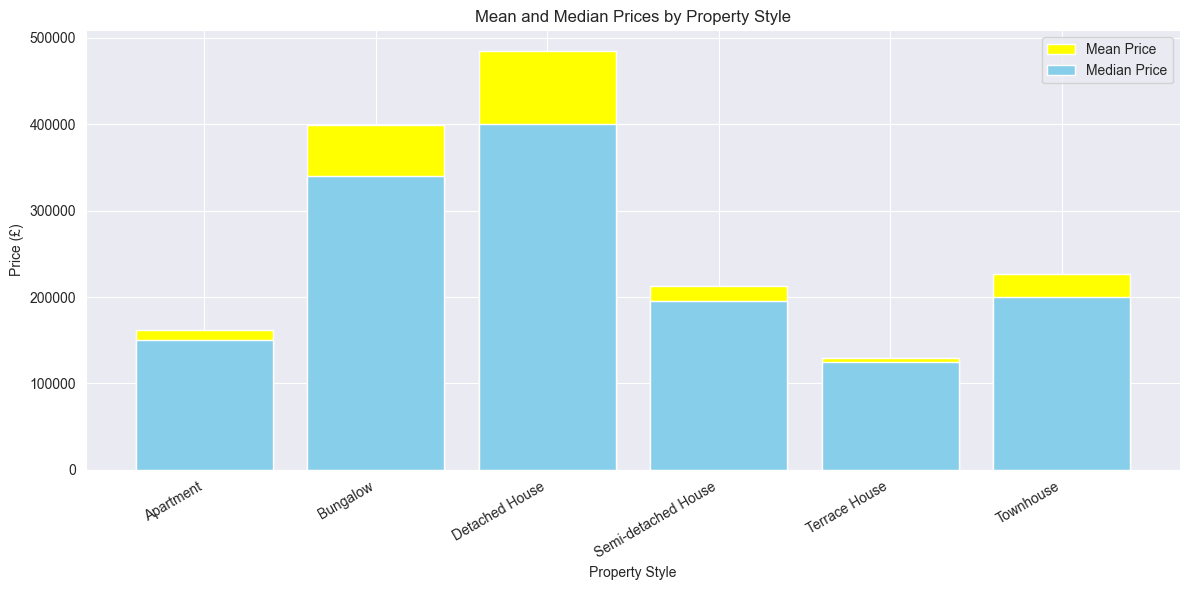

In [191]:
# Displaying this data on a graph
# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))

# Plot Mean Price
plt.bar(median_prices_per_style.index, median_prices_per_style['Mean Price'], color='yellow', label='Mean Price')

# Plot Median Price
plt.bar(median_prices_per_style.index, median_prices_per_style['Median Price'], color='skyblue', label='Median Price')

# Customize the plot
plt.title('Mean and Median Prices by Property Style')
plt.xlabel('Property Style')
plt.ylabel('Price (£)')
plt.legend()  # Show legend

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

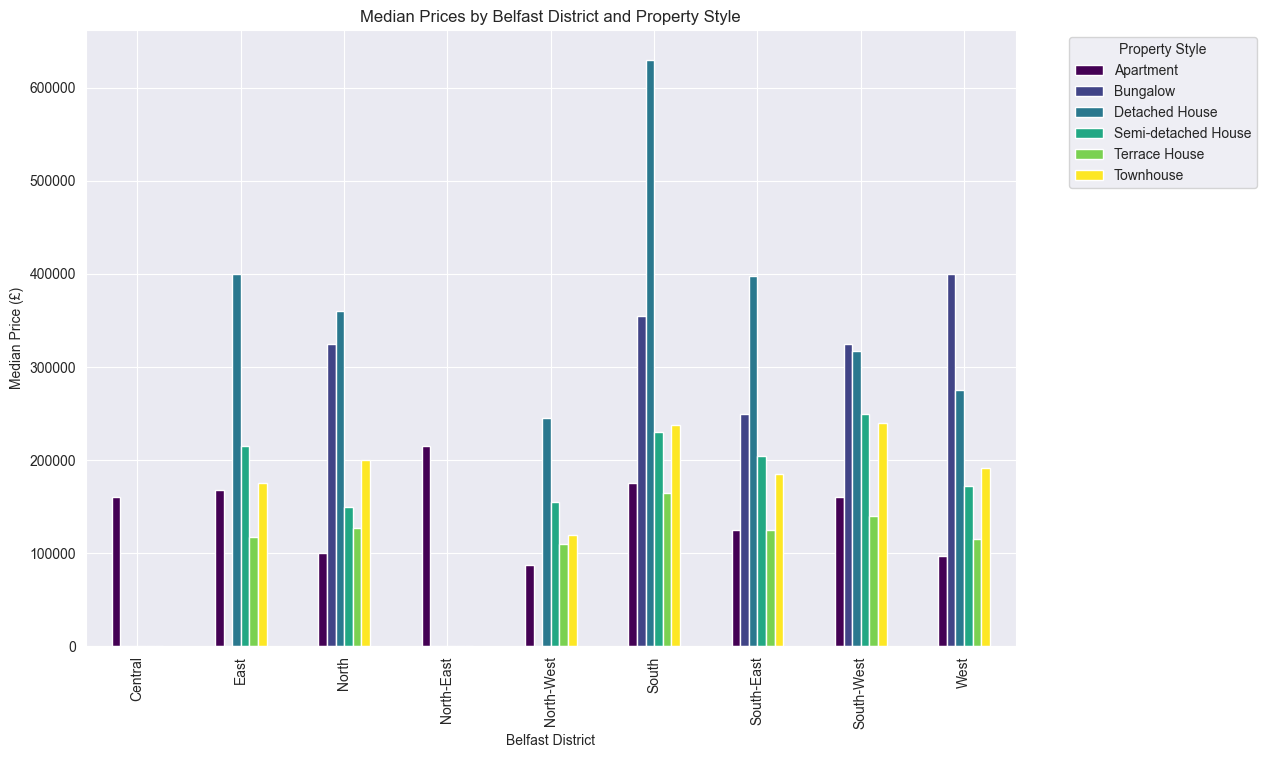

In [192]:
# Group by Belfast District and Style, and calculate the median price
median_prices = final_df.groupby(['Belfast District', 'Style'])['Price (£)'].median().unstack()

# Plot the data
ax = median_prices.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Customize the plot
plt.title('Median Prices by Belfast District and Property Style')
plt.xlabel('Belfast District')
plt.ylabel('Median Price (£)')
plt.legend(title='Property Style', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Show the plot
plt.show()


# We can see that South Belfast has by far the most expensive detached homes in Belfast.

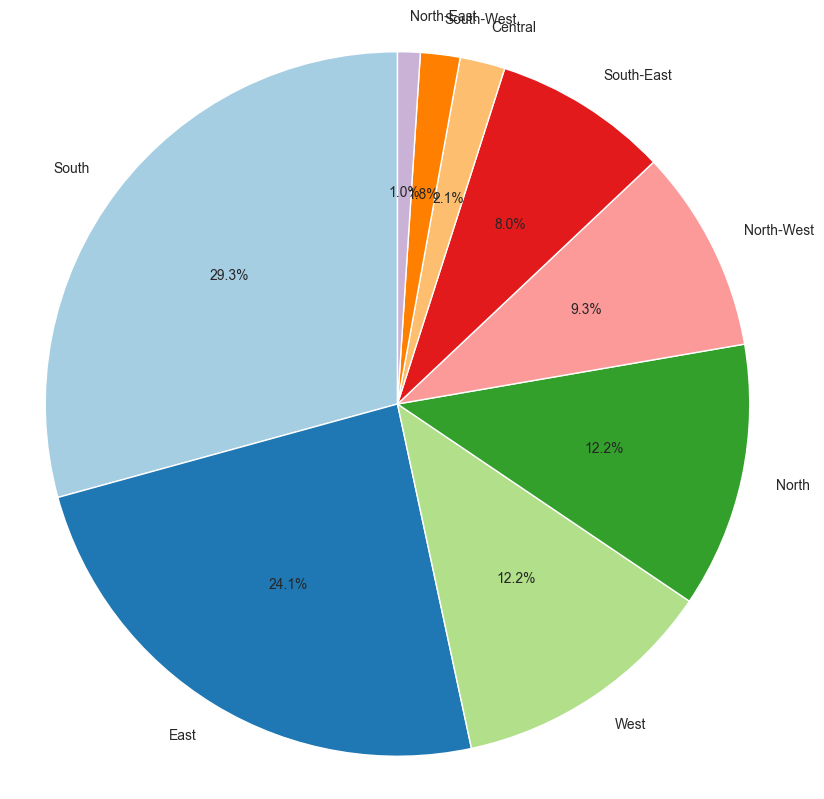

In [193]:
# Investigating how the properties are distributed across each Belfast district

# Count the occurrences of each district
district_counts = final_df['Belfast District'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(10, 10))
plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Customize the plot
plt.axis('equal')

# Show the plot
plt.show()


# We can see that the South and the East makeup the majority of the dataset.

In [194]:
# Investigating how the property styles are dispersed throughout the estate agents.
estate_agents_style = final_df.groupby(['Estate Agent', 'Style'])['Address'].count().sort_values(ascending=False)
estate_agents_style

Estate Agent            Style              
Ulster Property Sales   Semi-detached House    52
                        Terrace House          48
                        Detached House         24
Templeton Robinson      Detached House         22
Ulster Property Sales   Apartment              21
                                               ..
LJ Rentals              Semi-detached House     1
Kitson Residential      Detached House          1
Karl Bennett & Co       Terrace House           1
                        Apartment               1
Zenith Residential      Semi-detached House     1
Name: Address, Length: 196, dtype: int64

# As the most popular property style, we will take a closer look at the terrace houses.

In [195]:
# As the most popular property style, we will take a closer look at the terrace houses.
terrace_df = final_df.loc[final_df['Style'] == 'Terrace House']

terrace_analysis_df = terrace_df.groupby('Belfast District').agg({
    'Bedrooms': 'mean',
    'Price (£)': 'mean',
    'Rates': 'mean',
    'Address': 'count'
}).round(1)

terrace_analysis_df.rename(columns={'Address':'No. of Houses'}, inplace=True)
terrace_analysis_df.columns = ['Avg Bedrooms', 'Avg Price (£)', 'Avg Rates (£)', 'No. of Houses']
terrace_analysis_df

,Avg Bedrooms,Avg Price (£),Avg Rates (£),No. of Houses
Belfast District,,,,
East,2.7,121214.2,698.9,53
North,3.3,129623.4,609.5,32
North-West,2.6,110187.9,607.5,29
South,2.9,165095.7,1164.2,47
South-East,2.6,124261.1,736.7,18
South-West,3.0,139950.0,826.0,2
West,2.8,115592.7,711.3,41


# We will now use a correlation matrix to investigate the relationship between the numeric variables in the dataset.

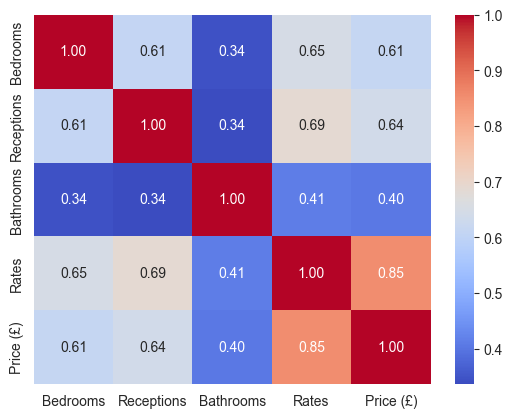

In [196]:
# Correlation between numeric variables
corr_matrix = final_df[['Bedrooms', 'Receptions', 'Bathrooms','Rates', 'Price (£)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# The matrix shows a strong correlation between the Rates and the Price. This is expected and may cause issues further down the line in our analysis. The correlation between other existing variables isn't cause for concern regarding any threat of multicollinearity.

# It would be interesting to learn of the potential importance of our features in terms of predicting the price. First we weill use the entire dataset to see if we can gain any valuable insights.

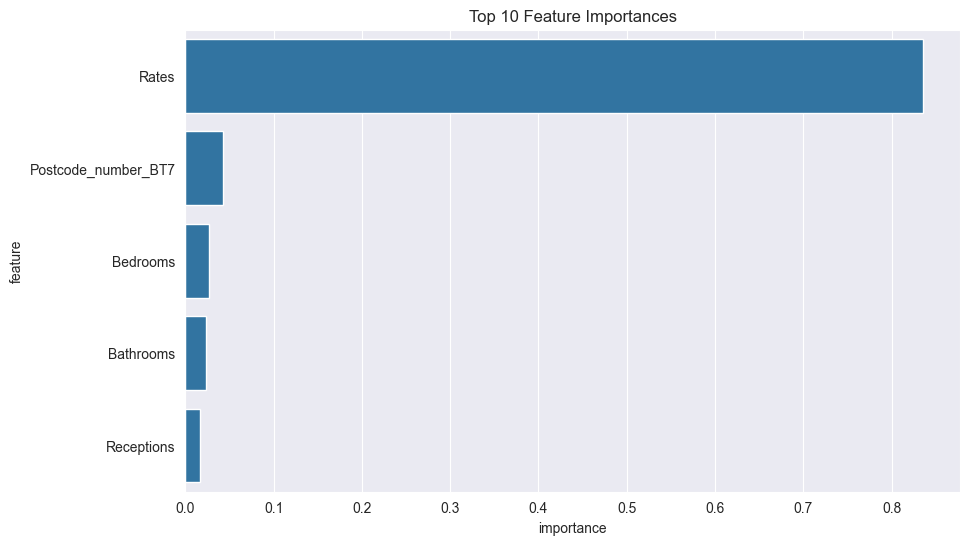

In [197]:
# This is done on the entire dataset, what if we only did it on the detached homes for example or else a certain district.
df_encoded = pd.get_dummies(final_df, columns=['Style', 'Belfast District', 'Postcode_number'])
df_encoded.drop(columns=['Postcode', 'Address', 'Estate Agent'], inplace=True)
df_encoded = df_encoded.dropna()

X = df_encoded.drop('Price (£)', axis=1)
y = df_encoded['Price (£)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot only the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(5))  # Use head(5) to select the top 5 rows
plt.title('Top 10 Feature Importances')
plt.show()


In [198]:
feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
2,Rates,0.835850
34,Postcode_number_BT7,0.042952
1,Bedrooms,0.026529
0,Bathrooms,0.023723
3,Receptions,0.016718
6,Style_Detached House,0.011338
36,Postcode_number_BT9,0.011141
7,Style_Semi-detached House,0.004885
15,Belfast District_South,0.004876
9,Style_Townhouse,0.003713


# The results here don't show us much. Like the correlation matrix there is a clear positive relationship between the Rates and the Price, to put it simply the higher the rates of a property, the higher the price. The reason for this is due to the high correlation between Rates and Price. None of the other features show any real influence in the model's predictions. Next we will remove the Rates column see if we can get any better insights.

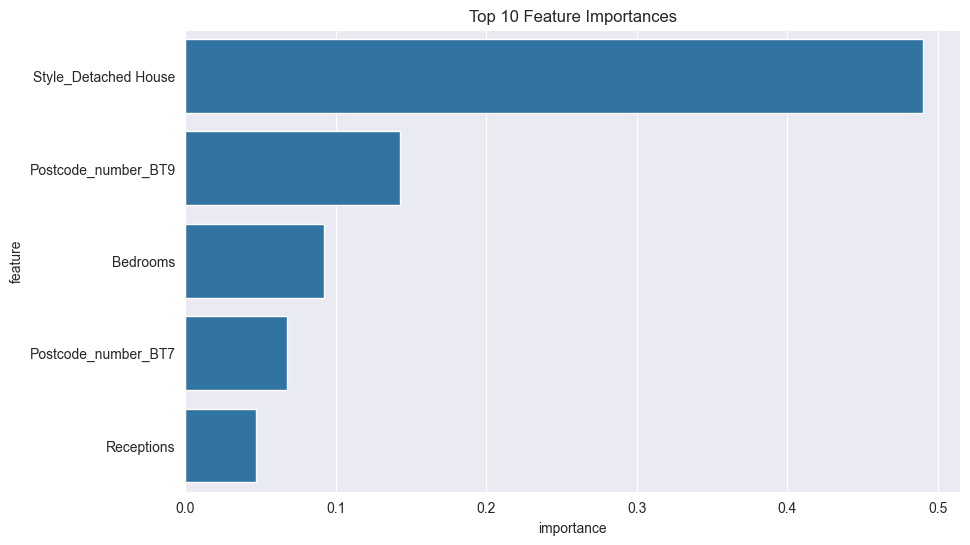

In [199]:
# This is done on the entire dataset, what if we only did it on the detached homes for example or else a certain district.
df_encoded = pd.get_dummies(final_df, columns=['Style', 'Belfast District', 'Postcode_number'])
df_encoded.drop(columns=['Postcode', 'Address', 'Estate Agent', 'Rates'], inplace=True)
df_encoded = df_encoded.dropna()

X = df_encoded.drop('Price (£)', axis=1)
y = df_encoded['Price (£)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot only the top 5 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(5
                                                                       ))  # Use head(5) to select the top 5 rows
plt.title('Top 10 Feature Importances')
plt.show()

# We can see that removing the Rates variable makes a big difference in the model's behaviour. Results show the strong influence a Detached House has in predicting the Price of a property, similarly the BT9 Postcode and the number of Bedrooms have a greater influence also.

In [200]:
feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
5,Style_Detached House,0.490540
35,Postcode_number_BT9,0.142896
1,Bedrooms,0.092224
33,Postcode_number_BT7,0.067799
2,Receptions,0.047048
0,Bathrooms,0.046471
7,Style_Terrace House,0.028210
14,Belfast District_South,0.020683
30,Postcode_number_BT4,0.015912
34,Postcode_number_BT8,0.011348


# Next we are going to build a price calculator. The calculator will take in 3 inputs (Property Style, Belfast District and No. of Bedrooms) and output the number of properties available, the range of prices someone can expect to pay and the average property price based on the search criteria.

In [201]:
# Price calculator function

def price_calculator(style,district,bedrooms):
    df = final_df.loc[((final_df['Style'] == style) & (final_df['Belfast District'] == district) & (final_df['Bedrooms'] == bedrooms))]
    if df.empty:
        print("I'm sorry there are no properties available that match your search criteria.")

    elif len(df) == 1:
        price = df.iloc[0]['Price (£)']
        print(f"There is only one property that matches your search criteria, the price is £{price}.")

    else:
        max_price = df['Price (£)'].max()
        min_price = df['Price (£)'].min()
        average_price = df['Price (£)'].mean()
        print(f'There are {len(df)} properties that match your search criteria.')
        print(f'Prices for a {style} in the {district} of Belfast with {bedrooms} bedrooms range between £{min_price} and £{max_price} .')
        print(f'The average price for a property is £{average_price.round(2)} .')


In [202]:
price_calculator(style='Apartment', district='West', bedrooms=4)

I'm sorry there are no properties available that match your search criteria.


In [203]:
price_calculator(style='Detached House', district='South', bedrooms=3)

There is only one property that matches your search criteria, the price is £285000.0.


In [204]:
price_calculator(style='Detached House', district='South', bedrooms=4)

There are 26 properties that match your search criteria.
Prices for a Detached House in the South of Belfast with 4 bedrooms range between £279950.0 and £1100000.0 .
The average price for a property is £590140.38 .


# Finally, I will enrich the data by bringing in an external dataset from (X) that contains the longitude and latitude values for each Postcode in Belfast. This data will facilitate my final piece of analysis and allow me to create some geospatial visualizations using Tableau.

In [205]:
lon_lat_df = pd.read_csv('ni_postcodes.csv')
lon_lat_df = lon_lat_df.iloc[:,2:]
lon_lat_df

,postcode,latitude,longitude
0,BT70 3NY,54.512217,-6.831684
1,BT4 1PW,54.602653,-5.878404
2,BT9 5PG,54.552294,-5.969607
3,BT39 9TS,54.777369,-5.952764
4,BT5 6ED,54.591760,-5.871559
...,...,...,...
49938,BT79 7ZJ,54.717834,-7.150987
49939,BT8 8SJ,54.508324,-5.897766
49940,BT8 8SL,54.508324,-5.897766
49941,BT80 8FU,54.653950,-6.745192


In [206]:
merged_df = pd.merge(final_df,
                     lon_lat_df,
                     left_on='Postcode',
                     right_on='postcode',
                     how='inner')

In [207]:
merged_df.drop(columns={'postcode'}, inplace=True)
merged_df

,Bathrooms,Postcode,Bedrooms,Rates,Receptions,Price (£),Postcode_number,Address,Style,Estate Agent,Belfast District,latitude,longitude
0,2,BT8 8FX,4,1652.05,2,335000.0,BT8,5 Haddo Crescent,Townhouse,Ulster Property Sales,South,54.542764,-5.935310
1,2,BT8 8GU,3,1129.41,1,229950.0,BT8,84 The Demesne,Townhouse,Ulster Property Sales,South,54.512565,-5.893641
2,1,BT8 7YG,2,1045.75,1,169000.0,BT8,17 Greer Park Heights,Townhouse,Fetherstons,South,54.546370,-5.919255
3,2,BT8 6BA,4,1882.35,1,245000.0,BT8,5 Croft Hill Cottages,Townhouse,Ulster Property Sales,South,54.547352,-5.898633
4,4,BT8 6ZR,4,1464.05,2,279950.0,BT8,23 Bracken Hill Close,Townhouse,Michael Chandler Estate Agents,South,54.545675,-5.889014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1,BT36 7EY,2,586.91,2,79950.0,BT36,17 Voltaire Gardens,Semi-detached House,Pinpoint Property,North,54.650078,-5.926694
743,1,BT14 6LF,4,630.39,2,119950.0,BT14,19 Clifton Crescent,Townhouse,House To Home Estate Agents,North-West,54.615119,-5.943149
744,1,BT11 9QW,2,652.13,1,129950.0,BT11,10 Gweedore Crescent,Townhouse,Ulster Property Sales,West,54.574590,-6.021376
745,3,BT17 0JE,5,3043.25,3,399950.0,BT17,11 Glengoland Gardens,Bungalow,Ulster Property Sales,West,54.567524,-6.018379


In [208]:
merged_df.to_csv('merged_df.csv')